#  Statistical Techniques for Data Analysis

We were tasked to find a dataset any subject we want to work with and also there are few requiments. 

    As a guideline, the dataset should have a minimum of two categorical variables and three numerical
    variables
    (these miminum criteria are guidelines and not hard thresholds).
    
    You must then use the methods covered in this course to complete an analysis and write a report on the
    data using Python Notebook. The analysis of the data should involve the use of tables, numerical
    summaries, and graphical summaries of the data.
    This part of your assignment will be assessed in terms of:
        • Use of appropriate functions in Python. [15 Marks]
        
        • Clearly commenting the code in the .ipynb file. [5 Marks]
        
        • Producing clear results for the chosen dataset, using appropriate statistical measures and
        appropriate plots. [15 Marks]
        
        • The quality of the graphics included. [5 Marks]
        
        • Summarising the conclusions from the analysis appropriately. [30 Marks]

In [1]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
bd_games = pd.read_csv('chess_games.csv')

bd_games.head()

,game_id,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,opening_response,opening_variation
0,1,False,13,Out of Time,White,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,5,Slav Defense: Exchange Variation,Slav Defense,NaN,Exchange Variation
1,2,True,16,Resign,Black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,4,Nimzowitsch Defense: Kennedy Variation,Nimzowitsch Defense,NaN,Kennedy Variation
2,3,True,61,Mate,White,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,3,King's Pawn Game: Leonardis Variation,King's Pawn Game,NaN,Leonardis Variation
3,4,True,61,Mate,White,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,3,Queen's Pawn Game: Zukertort Variation,Queen's Pawn Game,NaN,Zukertort Variation
4,5,True,95,Mate,White,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,5,Philidor Defense,Philidor Defense,NaN,NaN


In [3]:
bd_games.shape

(20058, 17)

In [4]:
bd_games['game_id'].shape

(20058,)

In [5]:
bd_games.isnull().sum()

game_id                  0
rated                    0
turns                    0
victory_status           0
winner                   0
time_increment           0
white_id                 0
white_rating             0
black_id                 0
black_rating             0
moves                    0
opening_code             0
opening_moves            0
opening_fullname         0
opening_shortname        0
opening_response     18851
opening_variation     5660
dtype: int64

In [6]:
bd_games['opening_variation'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 20058 entries, 0 to 20057
Series name: opening_variation
Non-Null Count  Dtype 
--------------  ----- 
14398 non-null  object
dtypes: object(1)
memory usage: 156.8+ KB


In [7]:
bd_games['opening_response'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 20058 entries, 0 to 20057
Series name: opening_response
Non-Null Count  Dtype 
--------------  ----- 
1207 non-null   object
dtypes: object(1)
memory usage: 156.8+ KB


In [8]:
bd_games.shape

(20058, 17)

In [9]:
#pip install missingno

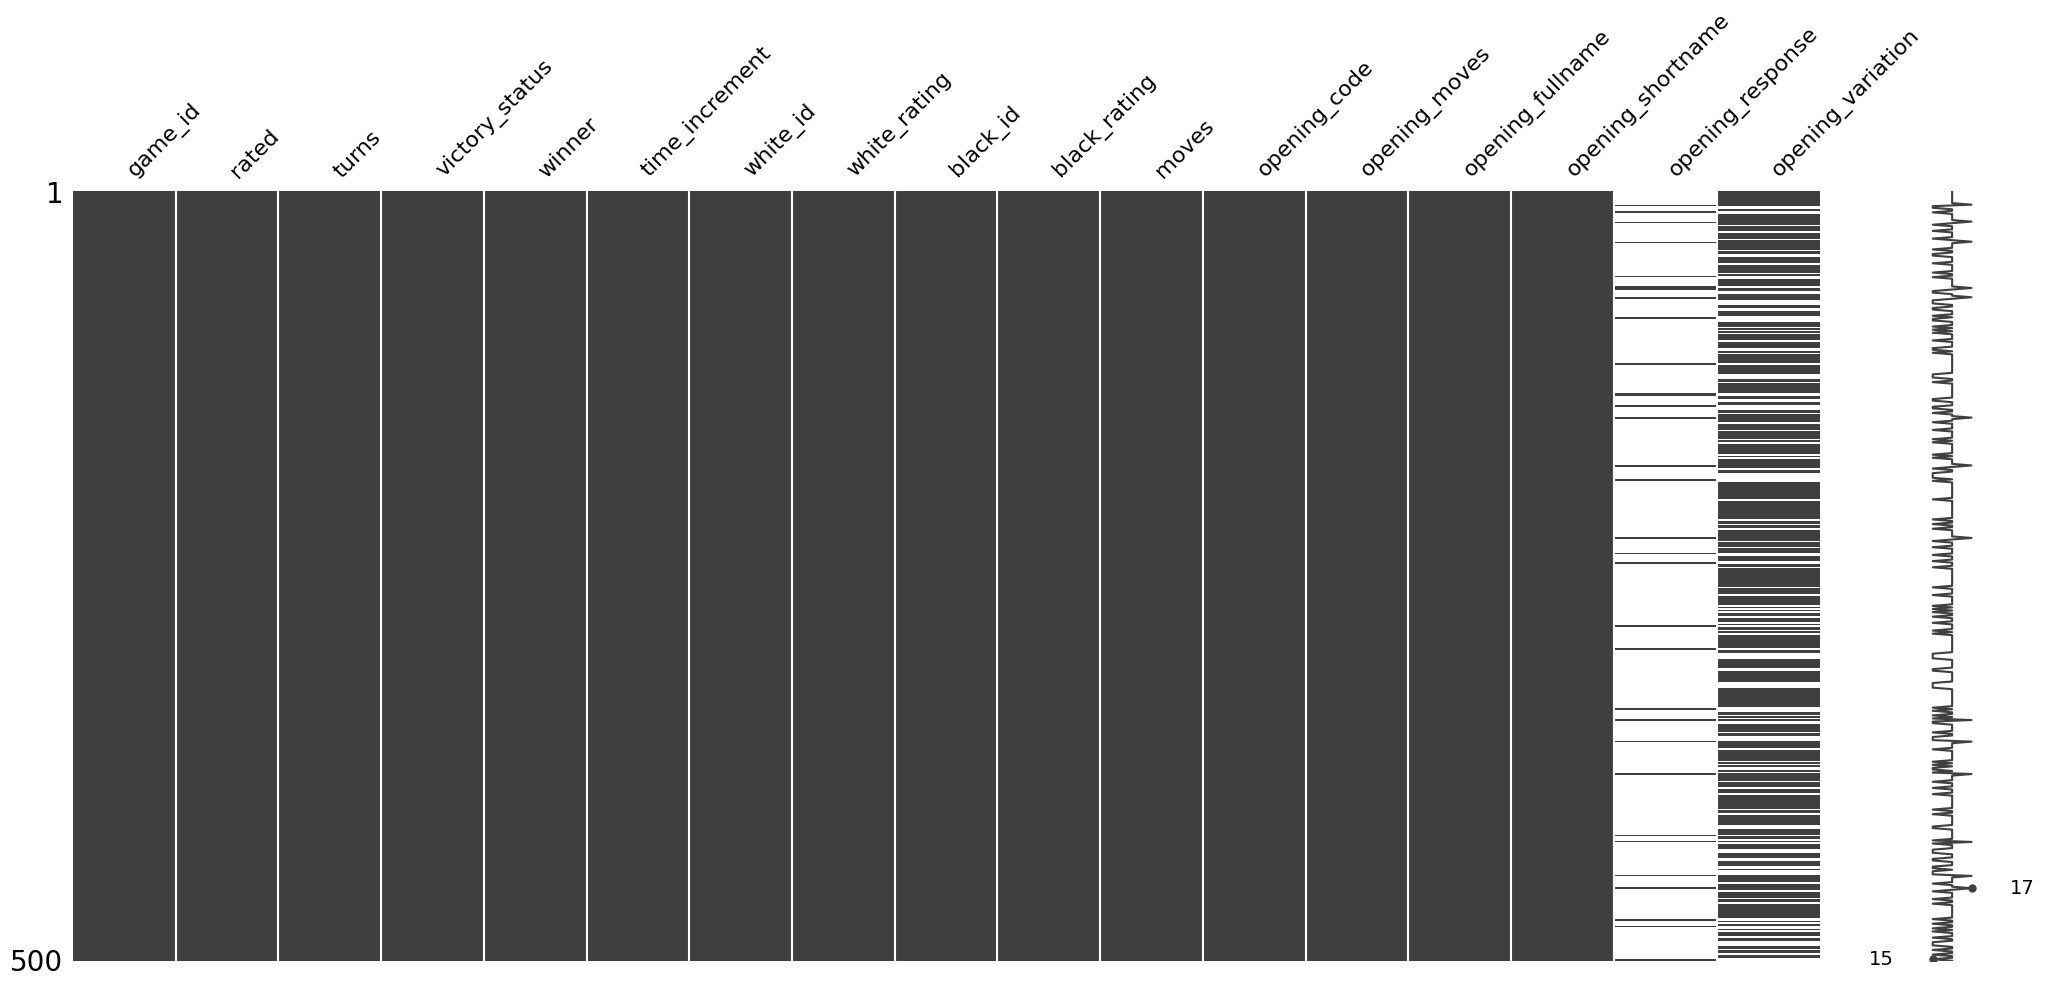

In [10]:
import missingno as msno

ax = msno.matrix(bd_games.sample(500))

In [11]:
# As we can see there missing values only in two columns that I will drop, because it is not necessary for our analysis. 
# I am going to plot more about the missing data to better undestanding. 

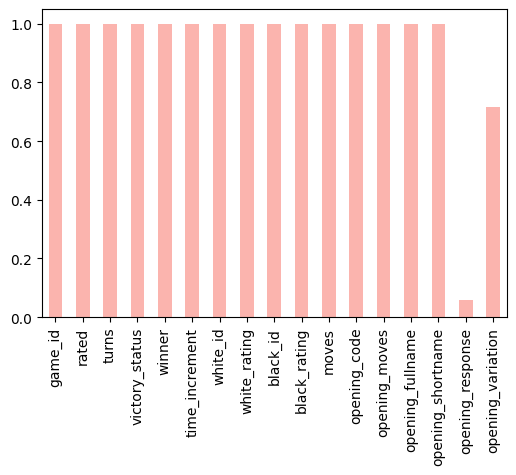

In [12]:
#https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html
fig, ax = plt.subplots(figsize=(6, 4))
(1 - bd_games.isnull().mean()).abs().plot.bar(ax=ax, colormap='Pastel1');

# Selecting features. 

In [13]:
bd_features = bd_games[['rated', 'turns', 'victory_status', 'winner' ,'white_rating', 'black_rating']]


In [14]:
bd_features.head()

,rated,turns,victory_status,winner,white_rating,black_rating
0,False,13,Out of Time,White,1500,1191
1,True,16,Resign,Black,1322,1261
2,True,61,Mate,White,1496,1500
3,True,61,Mate,White,1439,1454
4,True,95,Mate,White,1523,1469


In [15]:
bd_features.shape

(20058, 6)

In [16]:
bd_features['winner'].replace({'White': 0, 'Black' : 1, 'Draw' :2 }, inplace=True)



In [17]:
bd_features.winner.value_counts(dropna=False)

winner
0    10001
1     9107
2      950
Name: count, dtype: int64

In [18]:
bd_features.victory_status.value_counts(dropna=False)

victory_status
Resign         11147
Mate            6325
Out of Time     1680
Draw             906
Name: count, dtype: int64

In [19]:
bd_features['victory_status'].replace({'Resign': 0, 'Mate' : 1 , 'Out of Time' : 2, 'Draw' : 3}, inplace=True)

In [20]:
bd_features['rated'].replace({ False : 0 , True: 1}, inplace=True) #One of the things I realized was that when you dealing
# with data which the observations are classifier as True and False and you want to change to 1 and 2 to be able to continue
# your process. 'Python' doesn't understand that True and False are strings so you need to put out of " "

In [21]:
bd_features.dtypes

rated             int64
turns             int64
victory_status    int64
winner            int64
white_rating      int64
black_rating      int64
dtype: object

### Let's visualize the data, I'll plot total of winners. 



In [22]:
import seaborn as sns

<Axes: xlabel='winner', ylabel='Density'>

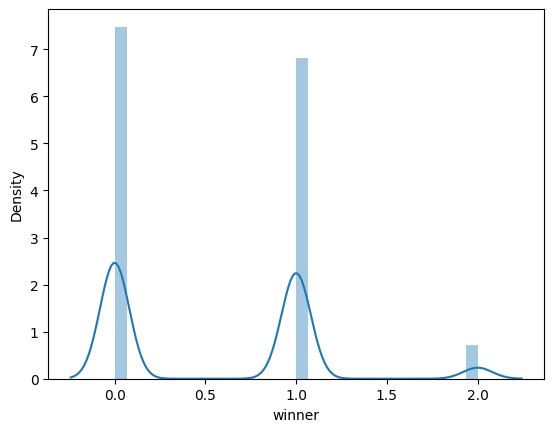

In [23]:
sns.distplot(bd_features['winner'], bins=30)

In [24]:
# When we plot this graph using the feature winner, we can see that there are more victories white pieces than thye black pieces.
# and Rarely there is a draw. 

# Questions: 

Why does white pieces win more than white? 


<Axes: xlabel='victory_status', ylabel='Density'>

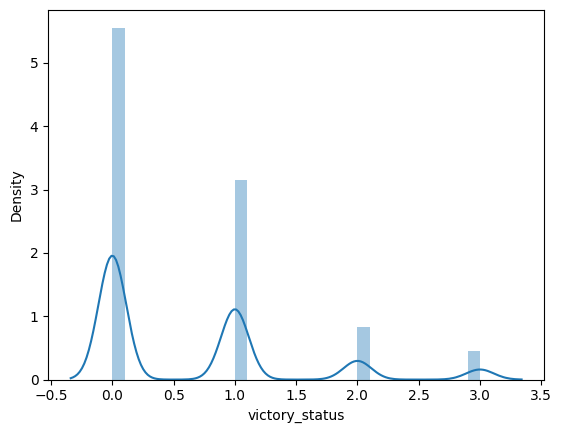

In [25]:
sns.distplot(bd_features['victory_status'], bins=30)


# TASK 2 - Probability (Discrete)

1 ) What is the probability of rolling exactly two 6s in five rolls of a fair die?

In [32]:
from math import exp 

In [33]:
num_rolls = 5

num_successes = 2

probability = (pow(1/6, num_successes)) * (pow(5/6, num_rolls - num_successes))

probability *= 10

print(probability)

0.1607510288065844


In [ ]:
# The number of industrial injuries on average per working week in a factory is 0.75.
#Assuming that the distribution of injuries follows a Poisson distribution, find the probability
#that in a particular week there will be no more than two accidents.


In [35]:
# Average per working week in a factory is 0.75 
lambda_value = 0.75 


pro_0 = exp(-lambda_value)
pro_1 = lambda_value * pro_0 
pro_2 = (lambda_value** 2 /2) * pro_0

total_pro = pro_0 + pro_1 + pro_2


print(total_pro)


0.9594945602551861


# Task 3 - Probability (Continuous):

